In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cinema_tickets_df = pd.read_csv("cinemaTicket_Ref.csv")

In [3]:
cinema_tickets_df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [4]:
cinema_tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [5]:
cinema_tickets_df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [6]:
cinema_tickets_df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [9]:
cinema_tickets_df['occu_perc'] = cinema_tickets_df['occu_perc'].fillna(cinema_tickets_df['occu_perc'].median())

In [10]:
cinema_tickets_df['capacity'] = cinema_tickets_df['capacity'].fillna(cinema_tickets_df['capacity'].median())

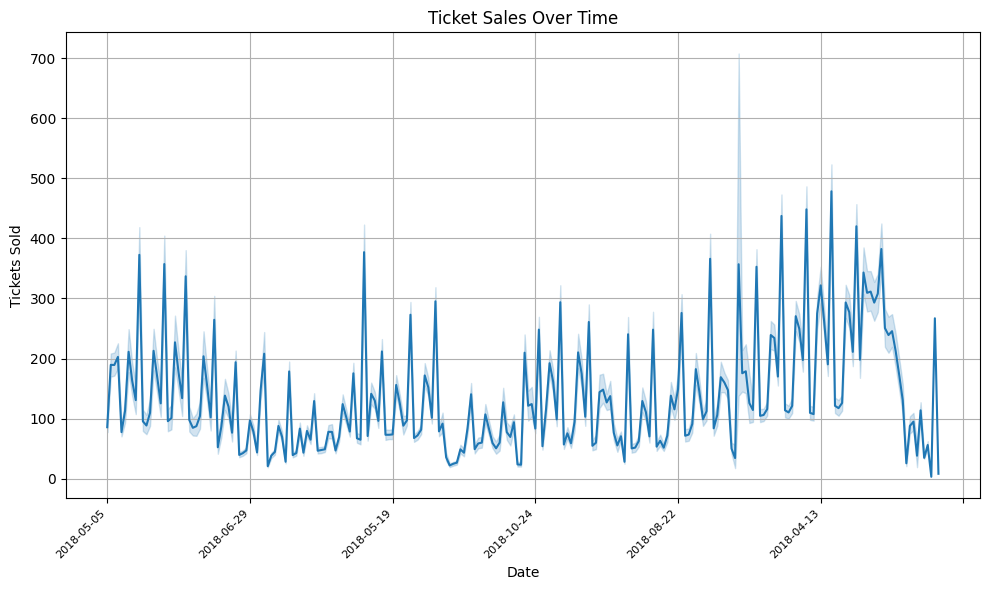

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='tickets_sold', data=cinema_tickets_df)
plt.title('Ticket Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Tickets Sold')
plt.xticks(rotation=45, ha='right', fontsize=8)  
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))
plt.grid(True)
plt.tight_layout()
plt.show()

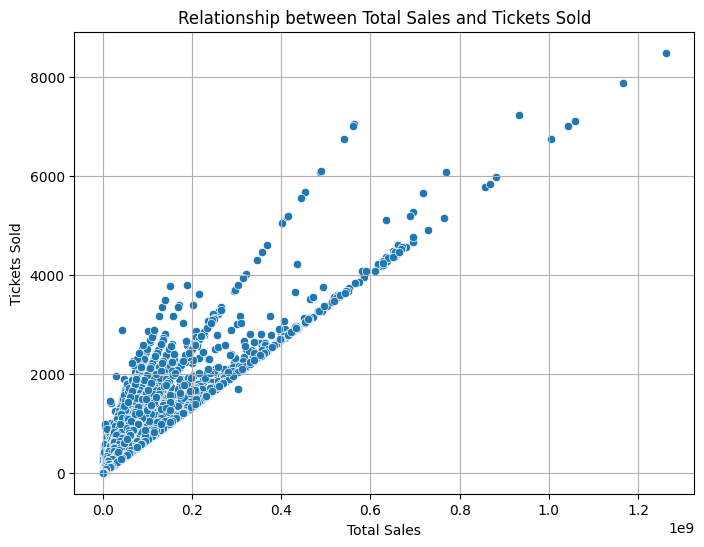

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sales', y='tickets_sold', data=cinema_tickets_df)
plt.title('Relationship between Total Sales and Tickets Sold')
plt.xlabel('Total Sales')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()

In [18]:
correlation_coefficient = cinema_tickets_df['total_sales'].corr(cinema_tickets_df['tickets_sold'])
print("Correlation Coefficient between Total Sales and Tickets Sold:", correlation_coefficient)

Correlation Coefficient between Total Sales and Tickets Sold: 0.915175883505254


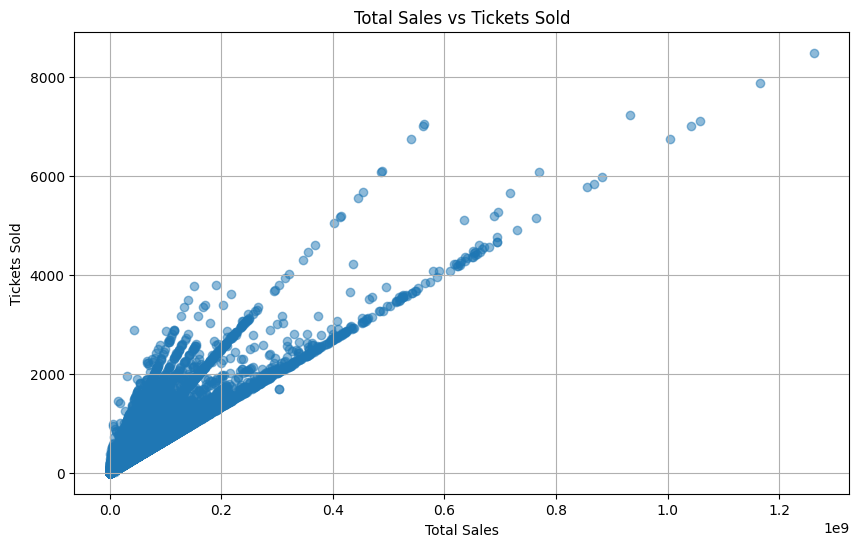

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(cinema_tickets_df['total_sales'], cinema_tickets_df['tickets_sold'], alpha=0.5)
plt.title('Total Sales vs Tickets Sold')
plt.xlabel('Total Sales')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(cinema_tickets_df['total_sales'], cinema_tickets_df['tickets_sold'])
regression_line = slope * cinema_tickets_df['total_sales'] + intercept

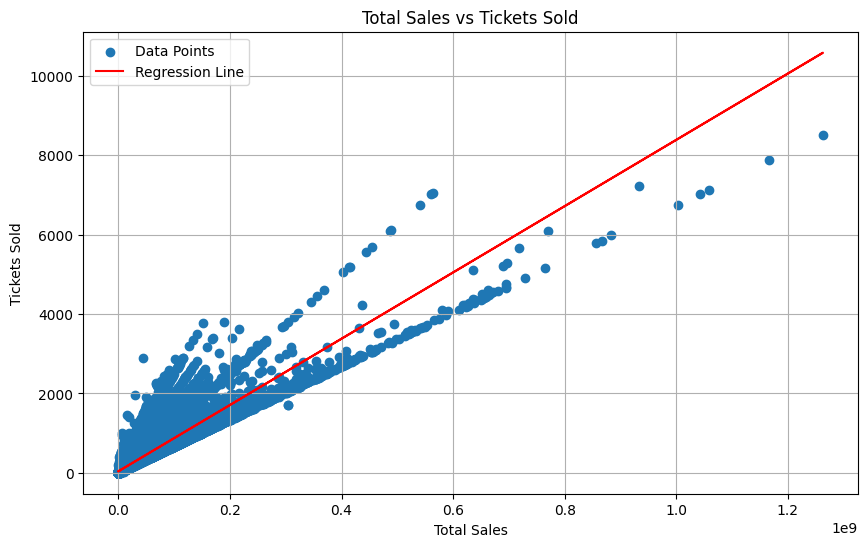

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(cinema_tickets_df['total_sales'], cinema_tickets_df['tickets_sold'], label='Data Points')
plt.plot(cinema_tickets_df['total_sales'], regression_line, color='red', label='Regression Line')
plt.title('Total Sales vs Tickets Sold')
plt.xlabel('Total Sales')
plt.ylabel('Tickets Sold')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
r_squared = r_value**2
print("Coefficient of Determination (R-squared):", r_squared)

Coefficient of Determination (R-squared): 0.8375468977496221


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = cinema_tickets_df[['total_sales']]
y = cinema_tickets_df['tickets_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)

Coefficient of Determination (R-squared): 0.8365359406285617
